In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans
import seaborn as sns

# Creating dataset
Creating dataframe of daily prices of stocks in Nifty 50 index. First extracting the list of stocks which are components of Nifty 50 from Wikipedia. Then using the pandas_datareader to get the daily prices of those stocks for past one year and creating a dataframe.

In [2]:
url = 'https://en.wikipedia.org/wiki/NIFTY_50'
table = pd.read_html(url)

In [3]:
stocks = table[1]['Symbol'].tolist()
stocks

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS']

In [4]:
df = pd.DataFrame(columns = stocks)

for s in stocks:
    df[s] =  data.get_data_yahoo(s,
                                start ='2019-12-30',
                                end ='2020-12-30',
                                interval = 'd')['Adj Close']
    df.rename(columns = {s : s[:-3]}, inplace = True)
df

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,SHREECEM,SUNPHARMA,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-30,361.949860,1790.766357,754.099976,3112.191406,4233.569336,9433.906250,458.852264,467.455139,2949.761475,478.706635,...,20404.923828,426.254944,183.699997,462.755310,2142.156738,751.652954,1184.757690,4039.215088,582.279907,247.948990
2019-12-31,361.999329,1773.527344,754.099976,3048.118652,4225.039062,9388.081055,454.169067,466.032990,2930.837646,476.961151,...,20272.123047,428.633179,185.149994,460.123505,2121.061035,732.062134,1179.001343,4033.333740,577.488098,244.811661
2020-01-01,373.521973,1781.724487,748.700012,3014.718750,4221.596680,9373.190430,451.678009,466.127808,2942.308105,474.667114,...,20228.322266,430.367340,184.449997,455.932159,2126.850586,731.870117,1146.051514,4052.224121,581.193115,246.704010
2020-01-02,378.961853,1779.190918,756.950012,2986.869141,4236.312988,9500.268555,453.571259,462.240631,2955.617676,472.273315,...,21136.509766,431.011505,193.750000,472.600128,2117.087158,735.663452,1146.895142,4231.458984,588.306763,247.301605
2020-01-03,378.318970,1740.192017,742.950012,2940.022949,4183.833984,9340.607422,453.471588,458.400879,2941.485352,468.732544,...,21027.005859,440.574127,191.100006,471.479187,2159.278564,744.354370,1131.114746,4205.939941,583.663147,250.090347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,470.750000,2642.550049,592.450012,3309.649902,5088.899902,9013.250000,507.200012,374.399994,3625.350098,824.650024,...,23894.400391,574.599976,169.199997,621.400024,2908.750000,948.150024,1490.849976,5033.950195,451.950012,385.549988
2020-12-24,478.549988,2648.250000,610.200012,3374.750000,5184.899902,8992.549805,517.299988,377.549988,3618.250000,833.200012,...,23826.800781,590.450012,175.949997,622.299988,2909.350098,947.250000,1495.900024,5044.750000,449.399994,382.200012
2020-12-28,483.549988,2683.899902,617.650024,3414.699951,5204.100098,8995.049805,521.599976,382.750000,3603.550049,830.150024,...,23715.599609,586.950012,186.350006,632.650024,2929.399902,947.099976,1543.550049,5142.149902,453.399994,382.899994


# Analysing the data

Computing average returns and volatility of the stocks and creating a new dataframe with the same.

In [5]:
returns = df.pct_change().mean() * 252
volatility = df.pct_change().std() * sqrt(252)
data = {'Returns': returns, 'Volatility': volatility}
data = pd.DataFrame(data)
data = data.reset_index()
data.rename(columns ={'index':'Stock'}, inplace = True)
data

,Stock,Returns,Volatility
0,ADANIPORTS,0.393451,0.436958
1,ASIANPAINT,0.488882,0.350273
2,AXISBANK,0.015938,0.630141
3,BAJAJ-AUTO,0.173634,0.374219
4,BAJFINANCE,0.431857,0.621641
5,BAJAJFINSV,0.105313,0.549067
6,BHARTIARTL,0.211144,0.431939
7,BPCL,-0.075647,0.502454
8,BRITANNIA,0.261345,0.360578
9,CIPLA,0.624733,0.397327


Finding the stocks which were gave the highest returns and ones which were the most volatile.

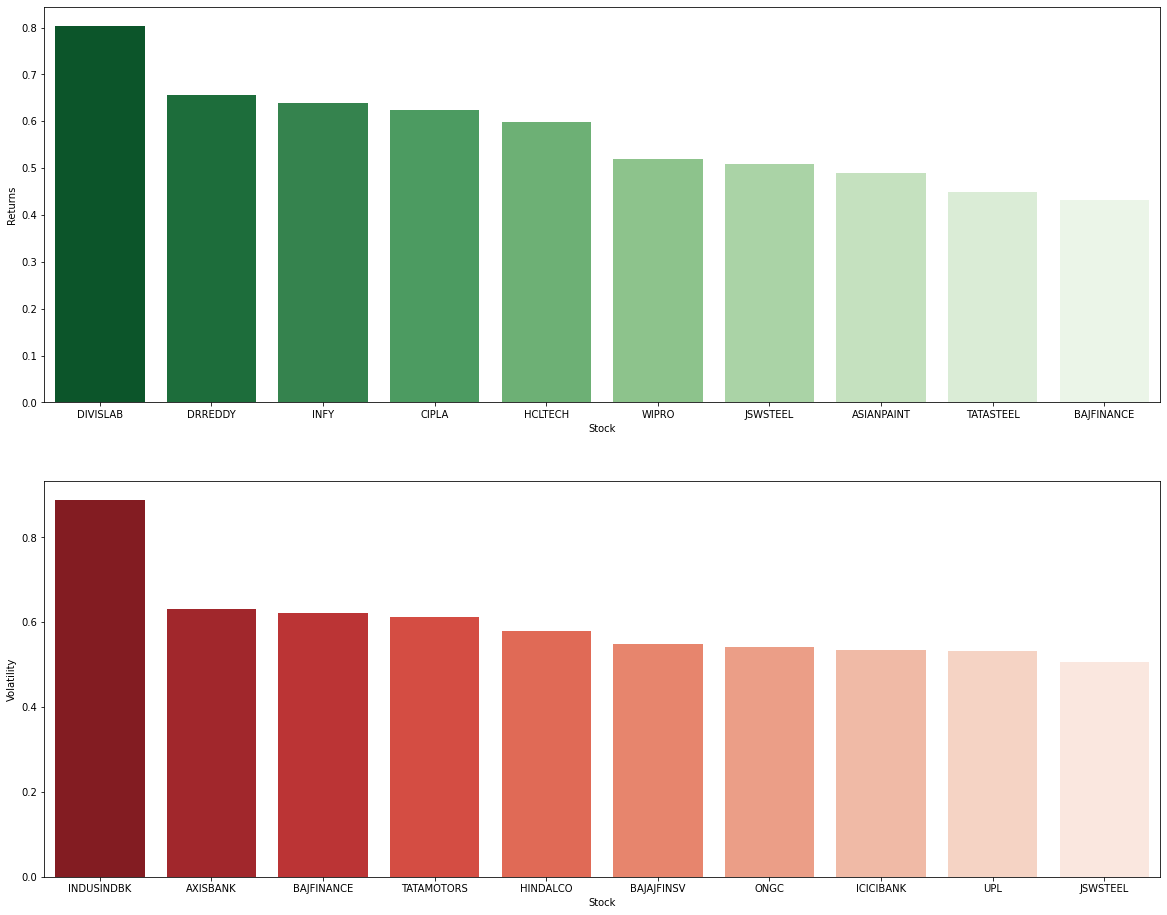

In [6]:
TopReturns = data.sort_values(by = 'Returns', ascending = False).head(10)
HighVolatility = data.sort_values(by = 'Volatility', ascending = False).head(10)

plt.figure(figsize=(20,16))
plt.subplot(211)
sns.barplot(data = TopReturns, x = 'Stock', y = 'Returns', palette = 'Greens_r')

plt.subplot(212)
sns.barplot(data = HighVolatility, x = 'Stock', y = 'Volatility', palette = 'Reds_r')

plt.show()

- Divislab gave the highest returns.
- Indusind Bank was the most volatile stock.

# Data modelling
## Finding the number of clusters
Finding the optimum number of clusters for the KMeans clustering model using the Elbow Curve method. The elbow method helps us determine the number of clusters where the distance from centroids (error) starts reducing. 

In [7]:
wcss =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 1000) 
    KM.fit(data[['Returns', 'Volatility']]) 
    wcss.append(KM.inertia_)      
wss = {'Within Cluster Sum of Sqaures':wcss}
wss = pd.DataFrame(wss)
wss

,Within Cluster Sum of Sqaures
0,3.193365
1,1.390324
2,0.896146
3,0.639371
4,0.468856
5,0.369248
6,0.312165
7,0.260374
8,0.211312
9,0.175838


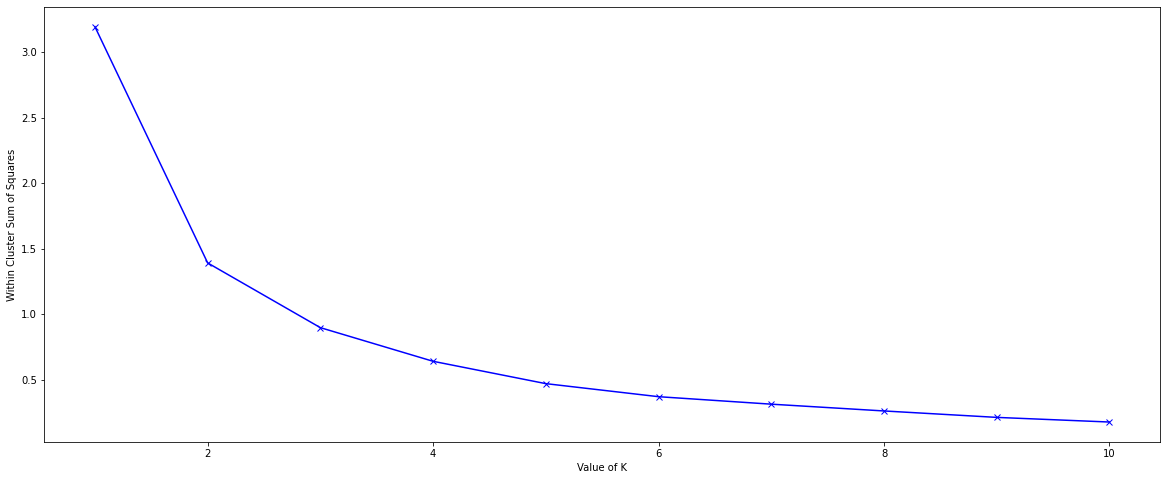

In [8]:
plt.figure(figsize = (20,8))
plt.plot(range(1, 11), wcss, 'bx-') 
plt.xlabel("Value of K") 
plt.ylabel("Within Cluster Sum of Squares") 
plt.show() 

From the above plot it can be determined that 3 would be the optimal number of clusters. 

## Clustering 
Setting the number of clusters as 3 and implementing the KMeans clustering model.

In [9]:
km = KMeans(n_clusters = 3)
cluster = km.fit_predict(data[['Returns', 'Volatility']])
data['Cluster'] = cluster
data = data.sort_values(by = 'Cluster')
data

,Stock,Returns,Volatility,Cluster
49,WIPRO,0.519244,0.397387,0
16,HCLTECH,0.599276,0.398891,0
25,INFY,0.639841,0.399735,0
12,DRREDDY,0.655341,0.355752,0
11,DIVISLAB,0.803494,0.372973,0
28,JSWSTEEL,0.508450,0.506710,0
31,M&M,0.423008,0.497252,0
9,CIPLA,0.624733,0.397327,0
4,BAJFINANCE,0.431857,0.621641,0
43,TATASTEEL,0.448848,0.492688,0


## Plotting the clusters

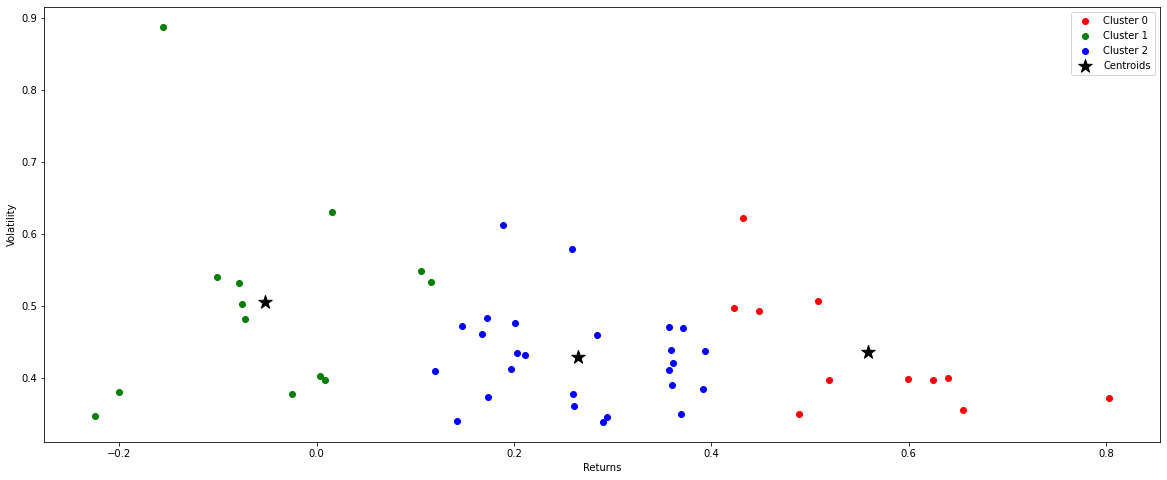

In [10]:
c0 = data[data.Cluster == 0]
c1 = data[data.Cluster == 1]
c2 = data[data.Cluster == 2]

plt.figure(figsize = (20,8))

plt.scatter(c0.Returns, c0.Volatility, color = 'red', label = 'Cluster 0')
plt.scatter(c1.Returns, c1.Volatility, color = 'green', label = 'Cluster 1')
plt.scatter(c2.Returns, c2.Volatility, color = 'blue', label = 'Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s = 200, color ='black', label='Centroids')

plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [11]:
plot = data.drop(['Stock'], axis = 1).groupby('Cluster').mean()
plot

,Returns,Volatility
Cluster,,
0,0.558452,0.435512
1,-0.052756,0.504952
2,0.265267,0.428649


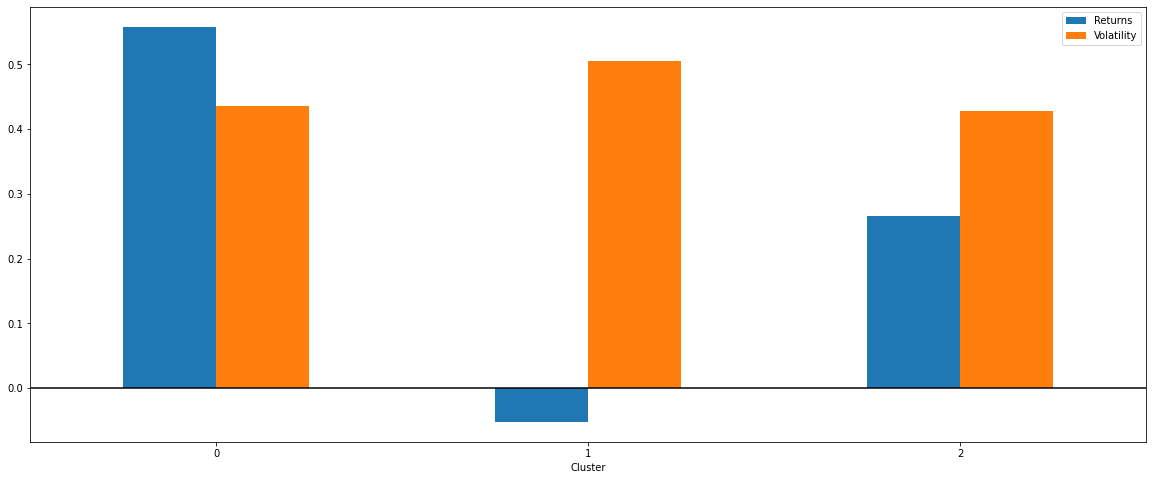

In [12]:
plot.plot(kind = 'bar',figsize = (20,8))
plt.xticks(rotation='horizontal')
plt.axhline(y=0, color = 'black')
plt.show()

- Cluster 0: It has the stocks with highest returns and somewhat similar volatility as cluster 2. Cluster 0 has the best picks because of the risk and returns ratio.
- Cluster 1: Cluster 1 has the riskiest stocks. These stocks were highly volatile and have given least returns among the 3 clusters.
- Cluster 2: It has stocks which have given returns better than cluster 1 but less than cluster 0. Also the volatility is lower than volatiliy of cluster 1. Hence, these are safer than stocks in cluster 1.

Hence, it can be inferred considering the risk-reward ratio that for picking stocks Cluster 0 > Cluster 2 > Cluster 1

In [13]:
print('Stocks in cluster 0', c0['Stock'].tolist())
print('\n')
print('Stocks in cluster 1', c1['Stock'].tolist())
print('\n')
print('Stocks in cluster 2', c2['Stock'].tolist())

Stocks in cluster 0 ['WIPRO', 'HCLTECH', 'INFY', 'DRREDDY', 'DIVISLAB', 'JSWSTEEL', 'M&M', 'CIPLA', 'BAJFINANCE', 'TATASTEEL', 'ASIANPAINT']


Stocks in cluster 1 ['ONGC', 'UPL', 'SBIN', 'SBILIFE', 'ITC', 'IOC', 'NTPC', 'ICICIBANK', 'INDUSINDBK', 'BPCL', 'AXISBANK', 'COALINDIA', 'BAJAJFINSV']


Stocks in cluster 2 ['ULTRACEMCO', 'TITAN', 'TECHM', 'TCS', 'TATAMOTORS', 'SUNPHARMA', 'SHREECEM', 'BAJAJ-AUTO', 'RELIANCE', 'POWERGRID', 'BHARTIARTL', 'HEROMOTOCO', 'NESTLEIND', 'MARUTI', 'BRITANNIA', 'LT', 'KOTAKBANK', 'EICHERMOT', 'GAIL', 'GRASIM', 'HDFC', 'HDFCBANK', 'HINDUNILVR', 'HINDALCO', 'HDFCLIFE', 'ADANIPORTS']
